# DEL 1 - Läs in bibliotek och data
Först behöver vi importera olika bibliotek, tex pandas och funktioner som vi skapat i de olika mapparna

Sen behöver vi läsa in och städa datan. Filen är snygg som den är, vi har inga NaN-värden eller dubletter och kategorinamnen ser bra ut.
Det vi behöver fixa är --> datatyperna

In [1]:
"""Importerar bibliotek och funktioner."""

import pandas as pd
import matplotlib.pyplot as plt
from src.io_utils import load_data, clean_data
import src.metrics as me 
import src.io_utils as io
import src.metrics as me
import src.viz as vi
import src.ecommerce as ec


In [2]:
"""Skapa en variabel 'df_raw' där vi läser in filen med funktionen som vi skapat i 'io_utils"""

df_raw = load_data("data/ecommerce_sales.csv")

"""Skapa en ny variabe 'df' där vi sparar en 'städat' fil med en funktion vi skapat i 'io_utils ."""

df = clean_data(df_raw)

df['month'] = df['date'].dt.to_period('M')  # Tar ut månaden från datumet

df['day_of_week'] = df['date'].dt.day_name() # Tar ur veckodagen från datumet


# DEL 2 - Presentera frågeställningar
- Vad säljer? - vilka kategorier driver mest intäkt?
- Var säljer vi? - vilka städer står för störst intäkt?
- När säljer vi? - finns tidsmönster/säsong i försäljningen?
- Hur ser en typisk order ut? - AOV (Average Order Value) och spridning.
- Topp-listor - topp-3 kategorier efter intäkt.
- Eventuella avvikelser - något oväntat mönster som sticker ut?
- Ni ska avsluta rapporten med 2-3 korta rekommendationer (punktlista) baserat på era resultat, 
- t.ex. “Satsa på kategori X i stad Y under månad Z

# Bakgrund och nyckeltal
I vår rapport har vi analyserat e-handlen i 5 olika städer. 
Nedan presneteras en snabb sammanfattning av nyckeltal.

In [3]:
ec.DataProccesing(df).key_words()

Aov: 1401.11 kr per order. 
Antalet ordrar: 2500 st. 
Inkomst: 3502767.23 kr. 
Antal enheter: 7463 st.


# Fördelningskurva

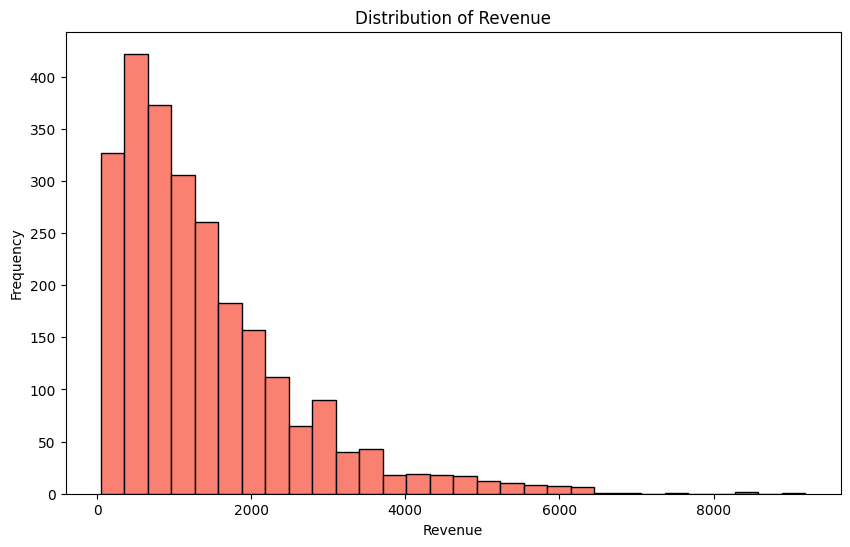

In [4]:
vi.distro_of_rev(df)

# Vad säljer vi
Diagrammen visar vilka kategorier som driver mest intäkt samt AOV per kategori

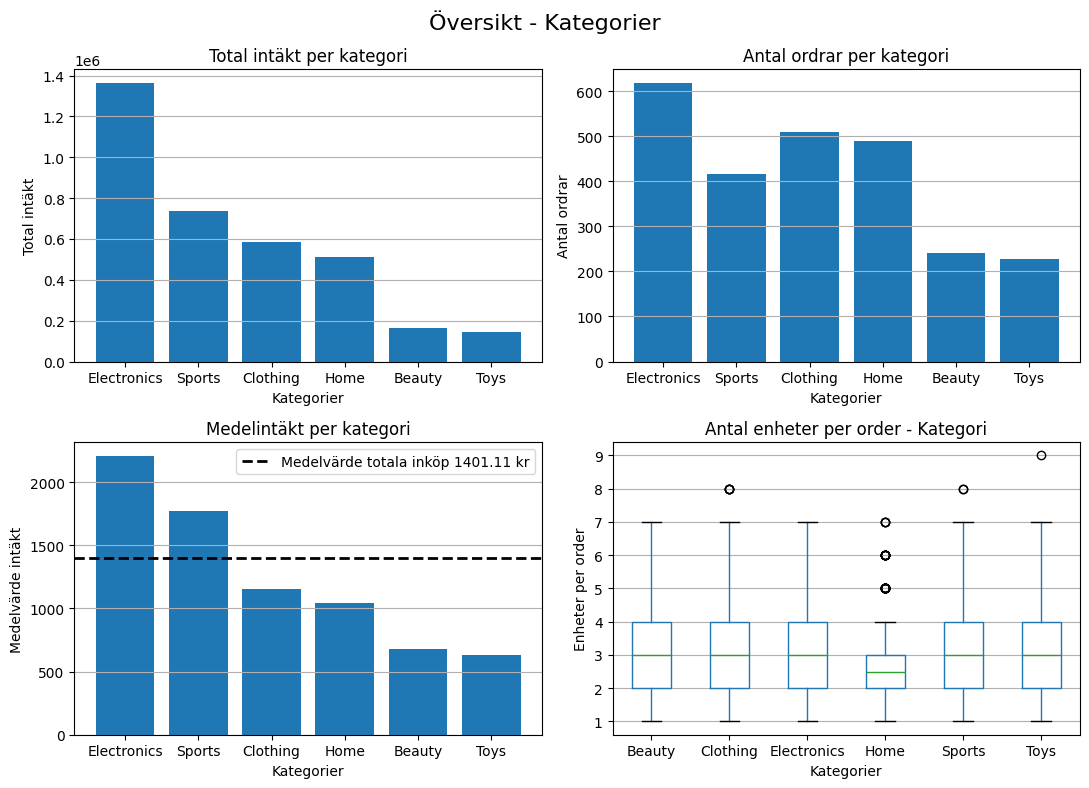

In [5]:
by_category = me.groupby_category(df)

aov = me.average_vaule_order(df)
fig, axes = plt.subplots(2, 2, figsize=(11, 8), sharex=False, sharey=False)
vi.bar(axes[0,0], by_category['category'], by_category['total'], 'Total intäkt per kategori', 'Kategorier', 'Total intäkt')
vi.bar(axes[0,1], by_category['category'], by_category['antal'], 'Antal ordrar per kategori', 'Kategorier', 'Antal ordrar')
vi.bar(axes[1,0], by_category['category'], by_category['medel'], 'Medelintäkt per kategori', 'Kategorier', 'Medelvärde intäkt')
axes[1,0].axhline(aov, linestyle='--', color='black', linewidth=2, label=f'Medelvärde totala inköp {aov} kr' ) 
axes[1,0].legend()
vi.box(axes[1,1],df,'units','category','Antal enheter per order - Kategori', 'Kategorier', 'Enheter per order',)
fig.suptitle('Översikt - Kategorier', fontsize=16)
plt.tight_layout()


# Var säljer vi
Diagrammen visar vilka städer som driver mest intäkt samt AOV per stad

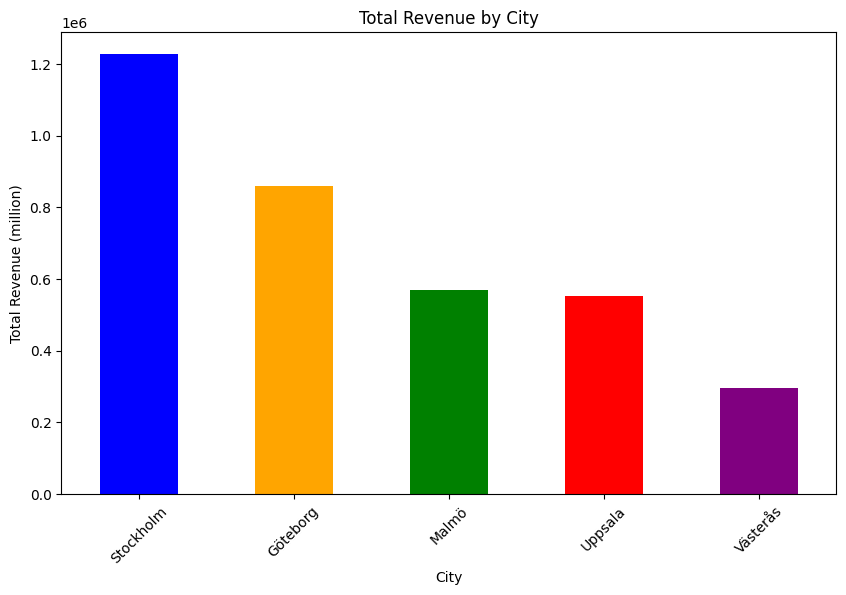

city
Stockholm    1227201.94
Göteborg      859019.65
Malmö         567926.32
Uppsala       551478.42
Västerås      297140.90
Name: revenue, dtype: float64

In [6]:
vi.plot_city_revenue(df)
me.city_revenue(df)


# När säljer vi
Diagrammet visar intäkt per månad via tidsaxel

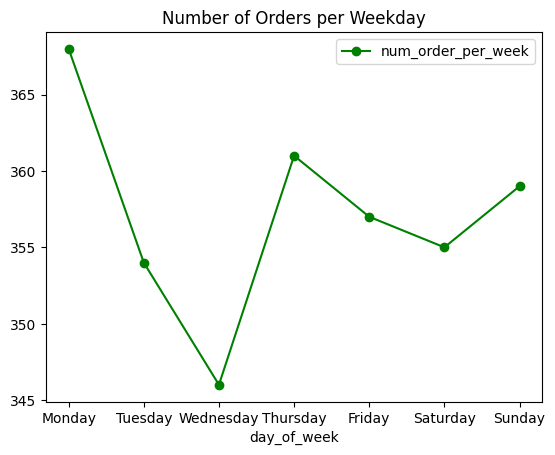

  day_of_week  num_order_per_week
1      Monday                 368
5     Tuesday                 354
6   Wednesday                 346
4    Thursday                 361
0      Friday                 357
2    Saturday                 355
3      Sunday                 359


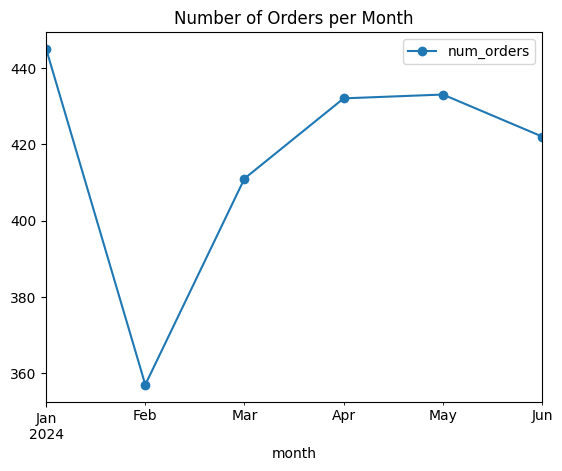

     month  num_orders
0  2024-01         445
1  2024-02         357
2  2024-03         411
3  2024-04         432
4  2024-05         433
5  2024-06         422


In [7]:

vi.plot_orders_weekday(df)
print(me.order_per_weekday(df))

vi.plot_orders_month(df)
print(me.order_per_month(df))

# Topplistor 
Visa top 3 kategorier sorterat på intäkt

In [8]:
top_3_category = by_category[['category','total']].head(3)


print(f'Topp 3 bäst säljande kategorier:\n\n {top_3_category}')

Topp 3 bäst säljande kategorier:

       category       total
0  Electronics  1364228.07
1       Sports   734653.42
2     Clothing   586744.91


# Avvikelser
Här får vi se vad vi lägger in när vi tagit ut olika data

# Rekomendatioen
Här lägger vi in våra rekomendtioner när vi analyserat datan